In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression

In [12]:
df = pd.read_csv("../data/heart_disease_clean.csv")
X = df.drop(columns=['target'])
y = df['target']

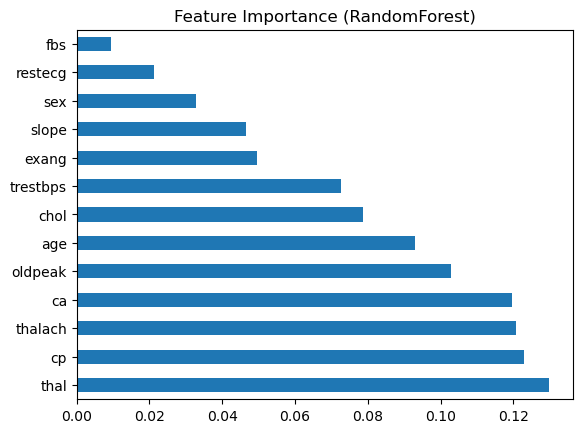

In [13]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

feat_imp.plot(kind='barh')
plt.title("Feature Importance (RandomForest)")
plt.show()

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lr = LogisticRegression(max_iter=1000)
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X_scaled, y)
selected = X.columns[rfe.support_]
print("RFE selected features:", selected.tolist())

RFE selected features: ['sex', 'cp', 'trestbps', 'thalach', 'exang', 'slope', 'ca', 'thal']


In [15]:
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)  

chi2_selector = SelectKBest(chi2, k=8)
chi2_selector.fit(X_mm, y)

chi2_features = X.columns[chi2_selector.get_support()]
print("Chi2 selected features:", chi2_features.tolist())

Chi2 selected features: ['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [16]:
selected_features = list(set(selected) | set(chi2_features))
pd.Series(selected_features).to_csv("../results/selected_features.csv", index=False)